In [53]:
%autoreload 2
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from collections import namedtuple

from reader import read_trips_additional
from scenarios import BerlinScenario, SCENARIOS_PATH

In [3]:
def path(scenario: BerlinScenario, kind, file_name_suffix) -> Path:
    return SCENARIOS_PATH / scenario.value / kind / f"{scenario}.{file_name_suffix}"

In [4]:
trips_additional_by_scenario = {scenario: read_trips_additional(path(scenario, "analysis", "trips_additional.csv")) for
                                scenario in BerlinScenario}
trips_additional_by_scenario[BerlinScenario.BASE]

,person,trip_number,modes,last_link,last_area,completed,visited_link_count,car_berlin_a_main_street,car_berlin_a_side_street,car_berlin_a_other_street,car_berlin_b_main_street,car_berlin_b_side_street,car_berlin_b_other_street,car_brandenburg,pt_berlin_a,pt_berlin_b,pt_brandenburg
trip_id,,,,,,,,,,,,,,,,,
10000001_1,10000001,1,walk-car-walk,134075,brandenburg,True,27,0.0,0.0,0.0,0.0,0.0,0.0,8158.0,0.0,0.0,0.0
10000001_2,10000001,2,walk-car-walk,77361,brandenburg,True,59,0.0,0.0,0.0,0.0,0.0,0.0,17858.8,0.0,0.0,0.0
10000001_3,10000001,3,walk-car-walk,31841,brandenburg,True,109,0.0,0.0,0.0,0.0,0.0,0.0,35870.0,0.0,0.0,0.0
10000001_4,10000001,4,walk-car-walk,144395,brandenburg,True,30,0.0,0.0,0.0,0.0,0.0,0.0,10967.6,0.0,0.0,0.0
10000001_5,10000001,5,walk-car-walk,106140,brandenburg,True,65,0.0,0.0,0.0,0.0,0.0,0.0,17452.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
freight_997_87464-berlin_1,freight_997_87464-berlin,1,walk-freight-walk,54169,berlin_umweltzone,True,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freight_998_87464-berlin_1,freight_998_87464-berlin,1,walk-freight-walk,90464,berlin_outside_umweltzone,True,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freight_999_87464-berlin_1,freight_999_87464-berlin,1,walk-freight-walk,88992,berlin_outside_umweltzone,True,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
ColData = namedtuple("ColData", ["color", "label"])

car_distance_cols = {
    "car_berlin_a_main_street": ColData("#ff8800", "Berlin A HS"),
    "car_berlin_a_side_street": ColData("#ffa53f", "Berlin A WS"),
    "car_berlin_a_other_street": ColData("#ffa53f", "Berlin A KS"),
    "car_berlin_b_main_street": ColData("#0088ff", "Berlin B HS"),
    "car_berlin_b_side_street": ColData("#3fa5ff", "Berlin B WS"),
    "car_berlin_b_other_street": ColData("#7fc3ff", "Berlin B KS"),
    "car_brandenburg": ColData("#00ddbb", "Brandenburg")
}
pt_distance_cols = {"pt_berlin_a", "pt_berlin_b", "pt_brandenburg"}

In [21]:
car_distances = {
    scenario: trips_additional_by_scenario[scenario][car_distance_cols.keys()].sum()
    for scenario in BerlinScenario
}

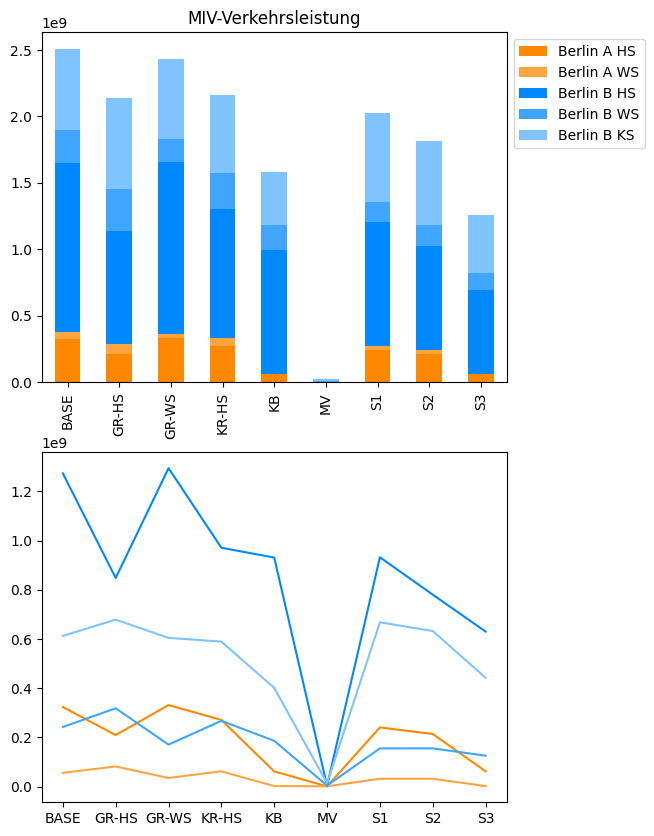

In [51]:
car_distance_berlin_cols = [col for col in car_distance_cols if "berlin" in col and col != "car_berlin_a_other_street"]
color = {col: data.color for col, data in car_distance_cols.items() if col in car_distance_berlin_cols}
fig, axs = plt.subplots(2, 1, figsize=(6, 10))
car_distances_berlin = pd.DataFrame(car_distances).T[car_distance_berlin_cols]
car_distances_berlin.plot.bar(stacked=True, color=color, title="MIV-Verkehrsleistung", ax=axs[0])
car_distances_berlin.plot.line(color=color, ax=axs[1], legend=False)
axs[0].legend([data.label for col, data in car_distance_cols.items() if col in car_distance_berlin_cols], loc="upper left", bbox_to_anchor=(1.0, 1.0))